In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
FILE = '/Users/user/data/research/proton-deuteron/bruno/root/momentum_tof.csv'

In [3]:
df = pd.read_csv(FILE)

2130

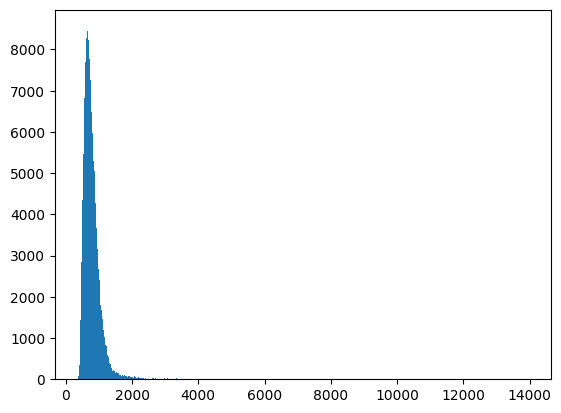

In [12]:
a = plt.hist(df['momentum'], bins='auto')
len(a[0])

299

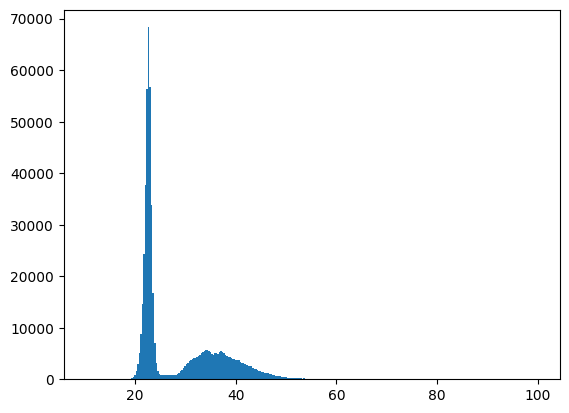

In [13]:
b = plt.hist(df['tof'], bins='auto')
len(b[0])

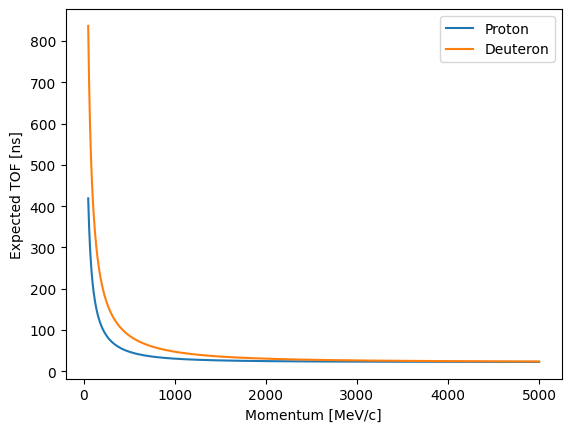

In [35]:
tau_l = 22.30  # ns
alpha = 1.0
delta_tau = 0.0  # ns

# masses (MeV/c^2)
m_p = 938.3
m_d = 1875.6

# momentum range (MeV/c)
p = np.linspace(50, 5000, 1000)  # from 50 to 5000 MeV/c

def tof(p, m, tau_l, alpha=1.0, delta_tau=0.0):
    return tau_l * np.sqrt(1 + (m/(alpha*p))**2) - delta_tau

plt.plot(p, tof(p, m_p, tau_l, alpha, delta_tau), label="Proton")
plt.plot(p, tof(p, m_d, tau_l, alpha, delta_tau), label="Deuteron")
plt.xlabel("Momentum [MeV/c]")
plt.ylabel("Expected TOF [ns]")
plt.legend()
plt.show()

/Users/user/code/research/proton-deuteron/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


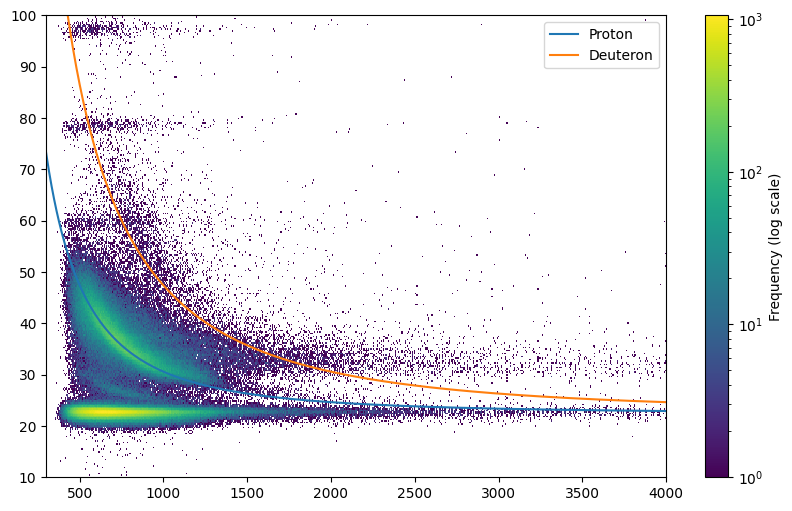

In [59]:
plt.figure(figsize=(10, 6))
h = plt.hist2d(df['momentum'], df['tof'], bins=[2130, 299], norm=LogNorm(), cmap='viridis')
plt.plot(p, tof(p, m_p, tau_l, alpha, delta_tau), label="Proton")
plt.plot(p, tof(p, m_d, tau_l, alpha, delta_tau), label="Deuteron")
# plt.xlabel('Max Normalised ADC Difference')
# plt.ylabel('Length of track (in wires)')
plt.ylim(10, 100)
plt.xlim(300, 4000)
# plt.title('Heatmap: Maxdiff vs Length of cluster')
plt.colorbar(label='Frequency (log scale)')
plt.legend()
plt.show()


In [52]:
m_d = 1875.6
tau_l = 22.30  # ns

def tof_expected(p, m, tau_l):
    return tau_l * np.sqrt(1 + (m/p)**2)

# tolerance band (adjust to your timing resolution)
dt = 0.3  # ns

df['tof_exp_deuteron'] = tof_expected(df['momentum'], m_d, tau_l)
mask = np.abs(df['tof'] - df['tof_exp_deuteron']) < dt
deuterons = df[mask].reset_index(drop=True)


In [56]:
deuterons[['run', 'subrun', 'event']].to_csv('momentumdeuterons.csv')

/Users/user/code/research/proton-deuteron/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


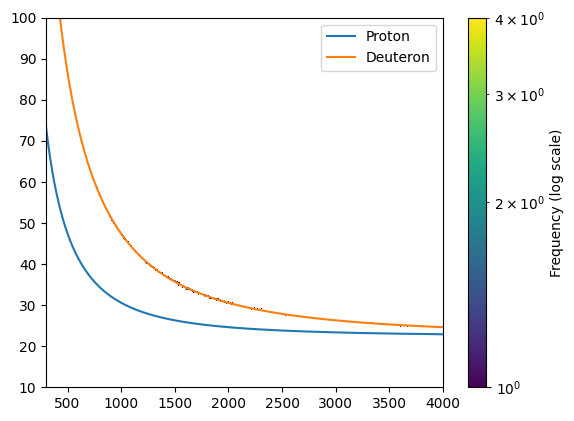

In [57]:
plt.figure()
h = plt.hist2d(deuterons['momentum'], deuterons['tof'], bins=[2130, 299], norm=LogNorm(), cmap='viridis')
plt.plot(p, tof(p, m_p, tau_l, alpha, delta_tau), label="Proton")
plt.plot(p, tof(p, m_d, tau_l, alpha, delta_tau), label="Deuteron")
# plt.xlabel('Max Normalised ADC Difference')
# plt.ylabel('Length of track (in wires)')
plt.ylim(10, 100)
plt.xlim(300, 4000)
# plt.title('Heatmap: Maxdiff vs Length of cluster')
plt.colorbar(label='Frequency (log scale)')
plt.legend()
plt.show()